In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_train = pd.read_csv(r"C:\Users\VICTUS\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
df_test = pd.read_csv(r"C:\Users\VICTUS\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Deleting column of 'PassengerId','Name','Ticket'.

In [8]:
df_train.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [9]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
df_train.describe(include=object)

,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,B96 B98,S
freq,577,4,644


# Visualization

# Bar plot

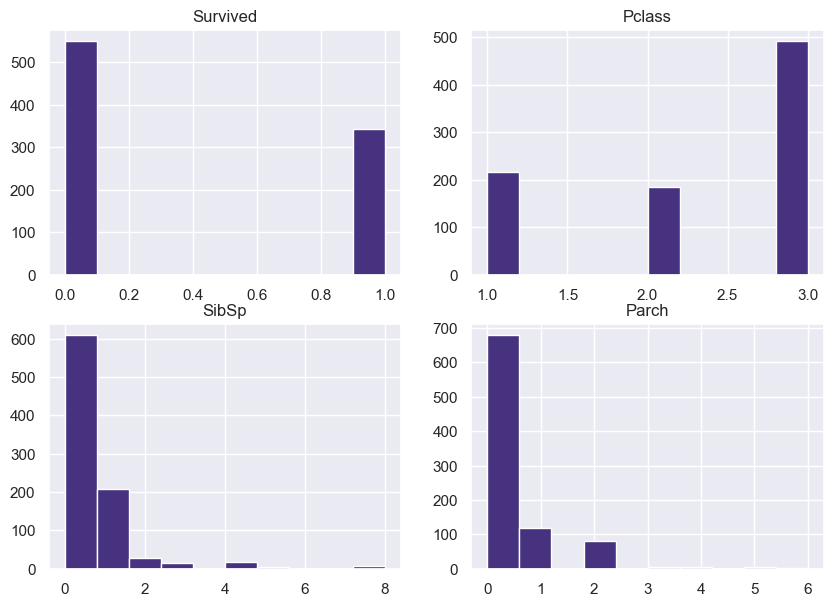

In [11]:
sns.set_theme(style='darkgrid',palette='viridis')
plt.figure(figsize = (10,7))
plt.subplot(2,2,1)
plt.hist(df_train['Survived'])
plt.title('Survived')
plt.subplot(2,2,2)
plt.hist(df_train.Pclass)
plt.title('Pclass')
plt.subplot(2,2,3)
plt.hist(df_train.SibSp)
plt.title('SibSp')
plt.subplot(2,2,4)
plt.hist(df_train.Parch)
plt.title('Parch')
plt.show()

# Histogram

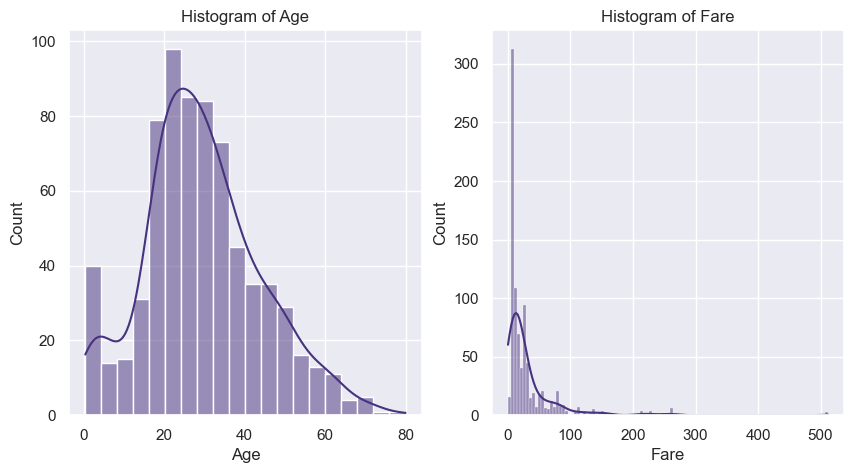

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df_train.Age,kde=True)
plt.title('Histogram of Age')
plt.subplot(1,2,2)
sns.histplot(df_train.Fare,kde=True)
plt.title('Histogram of Fare')
plt.show()

# Box Plot

<Axes: >

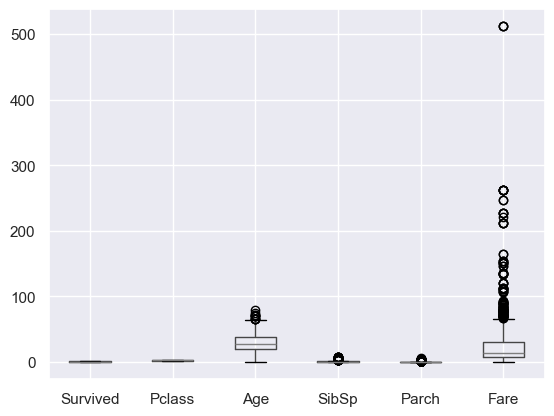

In [13]:
df_train.boxplot()

# Pair Plot

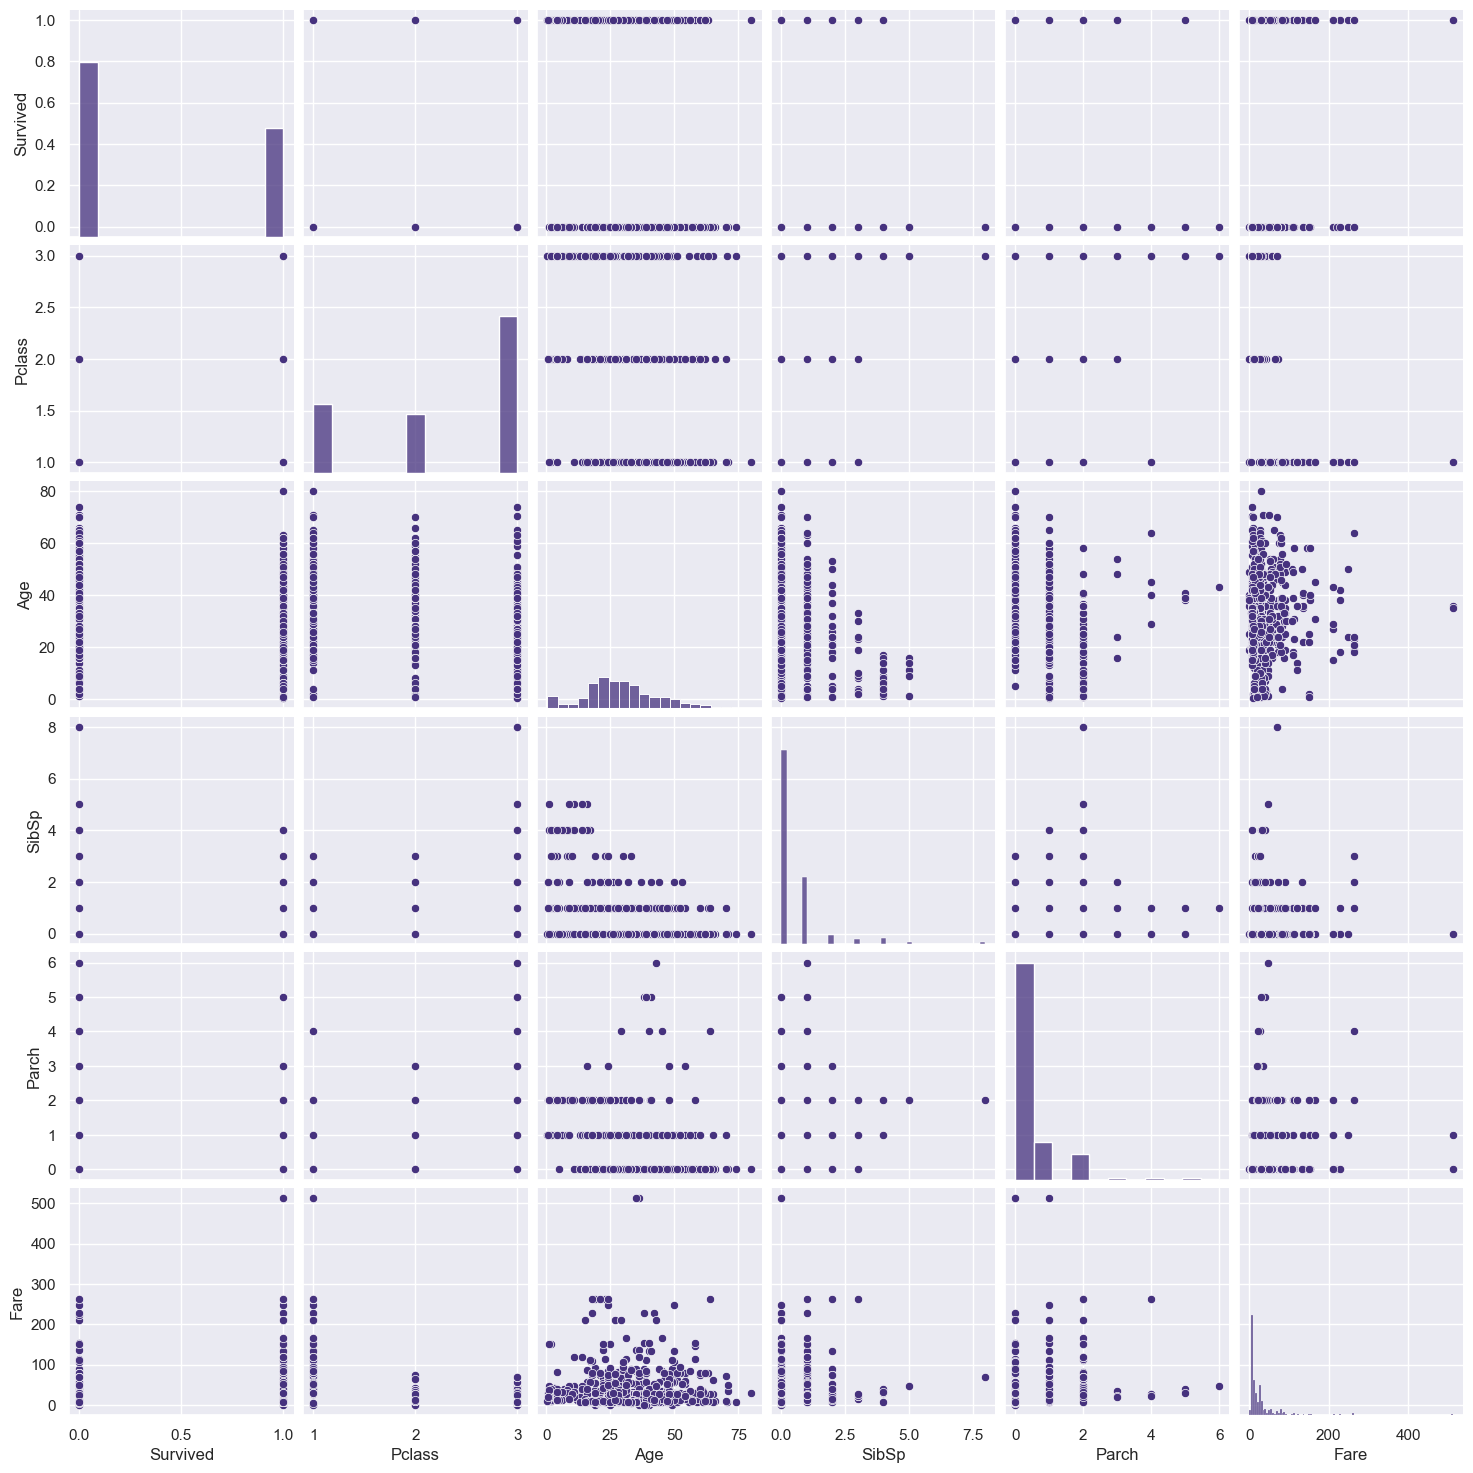

In [14]:
sns.pairplot(df_train)

# Coorelation Metrics

In [15]:
df_train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

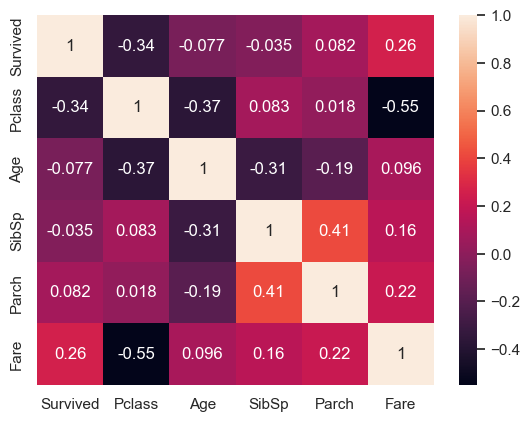

In [16]:
sns.heatmap(df_train.corr(numeric_only=True),annot=True)

# Data Preprocessing

# Handling missing values

In [17]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

In [19]:
df_train.drop(columns = ['Cabin'],inplace=True,axis=1)

In [20]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

# Handling Outliers

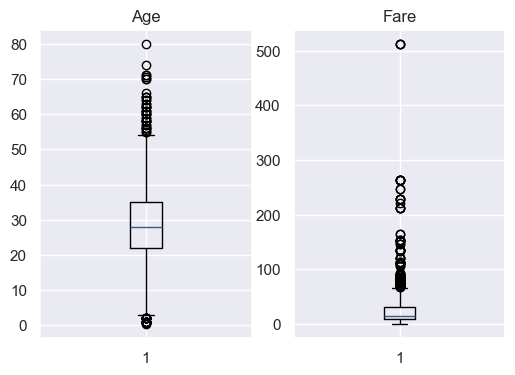

In [21]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.boxplot(df_train.Age)
plt.title('Age')
plt.subplot(1,2,2)
plt.boxplot(df_train.Fare)
plt.title('Fare')
plt.show()

In [22]:
def Outliers(data,columns):
    for col in columns:
        q1 = df_train[col].quantile(0.25)
        q3 = df_train[col].quantile(0.75)
        IQR = q3 - q1
        Low_ext = q1 - (1.5*IQR)
        Upp_ext = q3 + (1.5*IQR)
        df_train[col] = np.where(df_train[col]>Upp_ext,Upp_ext,np.where(df_train[col]<Low_ext,Low_ext,df_train[col]))

In [23]:
Outliers(df_train,df_train.iloc[:,3:4])

In [24]:
Outliers(df_train,df_train.iloc[:,6:7])

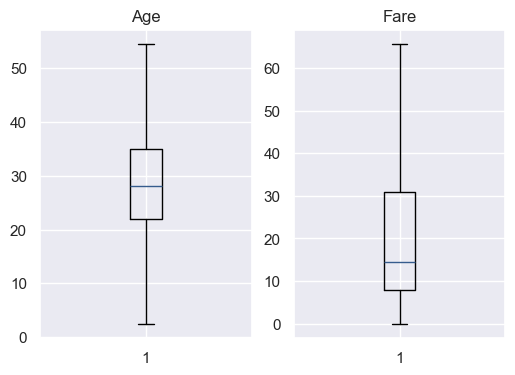

In [25]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.boxplot(df_train.Age)
plt.title('Age')
plt.subplot(1,2,2)
plt.boxplot(df_train.Fare)
plt.title('Fare')
plt.show()

# Encode categorical variables

In [26]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [27]:
Cat_cols = df_train.drop(df_train[['Age','Fare']],axis=1)

In [28]:
Cat_cols

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


In [29]:
Num_cols = df_train[['Age','Fare']]

In [30]:
df_train = pd.get_dummies(Cat_cols,dtype=int)

In [31]:
df_train

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,0,1,0,0,1
1,1,1,1,0,1,0,1,0,0
2,1,3,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,1
887,1,1,0,0,1,0,0,0,1
888,0,3,1,2,1,0,0,0,1
889,1,1,0,0,0,1,1,0,0


# Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
Sc = StandardScaler()

In [34]:
Num_cols1 = Sc.fit_transform(Num_cols)

In [35]:
Num_cols_Final = pd.DataFrame(Num_cols1,columns = Num_cols.columns)
Num_cols_Final

,Age,Fare
0,-0.583432,-0.820552
1,0.742685,2.031623
2,-0.251903,-0.787578
3,0.494038,1.419297
4,0.494038,-0.781471
...,...,...
886,-0.169020,-0.539655
887,-0.832079,0.290823
888,-0.086138,-0.029155
889,-0.251903,0.290823


In [36]:
df_Train_Final = pd.concat([df_train,Num_cols_Final],axis=1)
df_Train_Final

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,3,1,0,0,1,0,0,1,-0.583432,-0.820552
1,1,1,1,0,1,0,1,0,0,0.742685,2.031623
2,1,3,0,0,1,0,0,0,1,-0.251903,-0.787578
3,1,1,1,0,1,0,0,0,1,0.494038,1.419297
4,0,3,0,0,0,1,0,0,1,0.494038,-0.781471
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,1,-0.169020,-0.539655
887,1,1,0,0,1,0,0,0,1,-0.832079,0.290823
888,0,3,1,2,1,0,0,0,1,-0.086138,-0.029155
889,1,1,0,0,0,1,1,0,0,-0.251903,0.290823


# Model Building

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x = df_Train_Final.drop(columns = ['Survived'])

In [39]:
x

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,3,1,0,0,1,0,0,1,-0.583432,-0.820552
1,1,1,0,1,0,1,0,0,0.742685,2.031623
2,3,0,0,1,0,0,0,1,-0.251903,-0.787578
3,1,1,0,1,0,0,0,1,0.494038,1.419297
4,3,0,0,0,1,0,0,1,0.494038,-0.781471
...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,0,0,1,-0.169020,-0.539655
887,1,0,0,1,0,0,0,1,-0.832079,0.290823
888,3,1,2,1,0,0,0,1,-0.086138,-0.029155
889,1,0,0,0,1,1,0,0,-0.251903,0.290823


In [40]:
y = df_Train_Final['Survived']

In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [43]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.0/124.9 MB 279.3 kB/s eta 0:07:28
   ---------------------------------------- 0.1/124.9 MB 599.1 kB/s eta 0:03:29
   ---------------------------------------- 0.2/124.9 MB 748.1 kB/s eta 0:02:47
   ---------------------------------------- 0.2/124.9 MB 689.9 kB/s eta 0:03:01
   ---------------------------------------- 0.3/124.9 MB 930.9 kB/s eta 0:02:14
   ---------------------------------------- 0.3/124.9 MB 824.9 kB/s eta 0:02:32
   ----------

In [46]:
import lightgbm as lgb 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix

# LGBM 

In [47]:
lgb_model = lgb.LGBMClassifier()

In [48]:
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

In [49]:
y_pred_lgb = lgb_model.predict(x_test)

In [57]:
print('LBGM:-')
print(classification_report(y_test,y_pred_lgb))

LBGM:-
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



# XGBM

In [58]:
xgb_model = XGBClassifier()

In [59]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred_xgb = xgb_model.predict(x_test)

In [61]:
print('XGBM:-')
print(classification_report(y_test,y_pred_xgb))

XGBM:-
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Hyperparameter Tuning for LBGM

In [62]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameter_lgb = {'num_leaves':[31,50],'learning_rate':[0.01,0.1],'n_estimators':[100,200,300]}
parameter_xgb = {'n_estimators':[100,200,300],'learning_rate':[0.01,0.1,0.2],'max_depth':[3,5,7,1],
                'min_child_weight':[1,3,5],'subsample':[0.6,0.8,1.0],
                'gamma':[0,0.1,0.2]}

In [66]:
lgb_grid = GridSearchCV(lgb_model,param_grid=parameter_lgb,cv=5,verbose=2,scoring='accuracy')

In [67]:
lgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 50]},
             scoring='accuracy', verbose=2)

In [68]:
lgb_grid.best_params_,lgb_grid.best_score_

({'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31},
 0.8286220821432089)

In [69]:
Q = lgb_grid.predict(x_test)

In [80]:
print('Tunned_LGBM_Acc:-')
print(classification_report(y_test,Q))

Tunned_LGBM_Acc:-
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# Hyperparameter Tuning for XGBM

In [72]:
xgb_grid = GridSearchCV(xgb_model,param_grid=parameter_xgb,cv=5,scoring='accuracy',verbose=3)

In [73]:
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV 1/5] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=0.811 total time=   0.0s
[CV 2/5] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=0.839 total time=   0.0s
[CV 3/5] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=0.845 total time=   0.0s
[CV 4/5] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=0.782 total time=   0.0s
[CV 5/5] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=0.845 total time=   0.0s
[CV 1/5] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.818 total time=   0.0s
[CV 2/5] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, sub

C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 1],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=3)

In [74]:
xgb_grid.best_params_,xgb_grid.best_score_

({'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 1,
  'n_estimators': 100,
  'subsample': 1.0},
 0.8426868905742143)

In [75]:
Y = xgb_grid.predict(x_test)

In [79]:
print('Tunned_XGBM_Acc:-')
print(classification_report(y_test,Y))

Tunned_XGBM_Acc:-
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Comparative Analysis

In [82]:
print('Tunned_LGBM_Acc:-')
print(classification_report(y_test,Q))

print('Tunned_XGBM_Acc:-')
print(classification_report(y_test,Y))

Tunned_LGBM_Acc:-
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Tunned_XGBM_Acc:-
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Comparison Before Hyperparameter Tuning

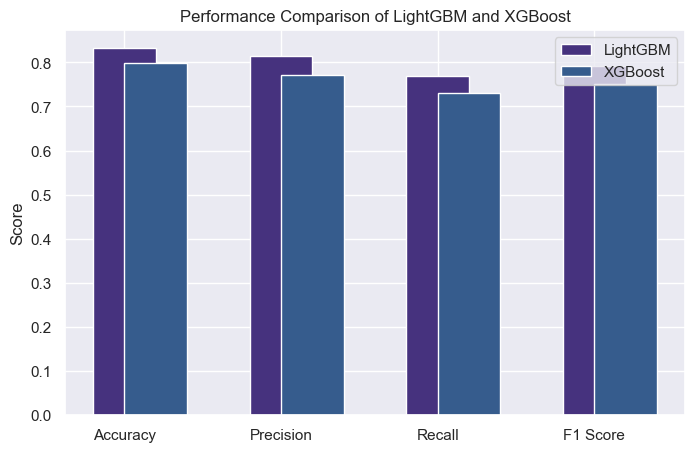

In [91]:
# Visualization can include comparison charts of model performance metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_metrics = [accuracy_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_lgb),
               recall_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_lgb)]
xgb_metrics = [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb),
               recall_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb)]

# Bar plot for comparison
plt.figure(figsize=(8, 5))
plt.bar(metrics, lgb_metrics, width=0.4, label='LightGBM', align='center')
plt.bar(metrics, xgb_metrics, width=0.4, label='XGBoost', align='edge')
plt.ylabel('Score')
plt.title('Performance Comparison of LightGBM and XGBoost')
plt.legend()
plt.show()

# Comparison After Hyperparameter Tuning

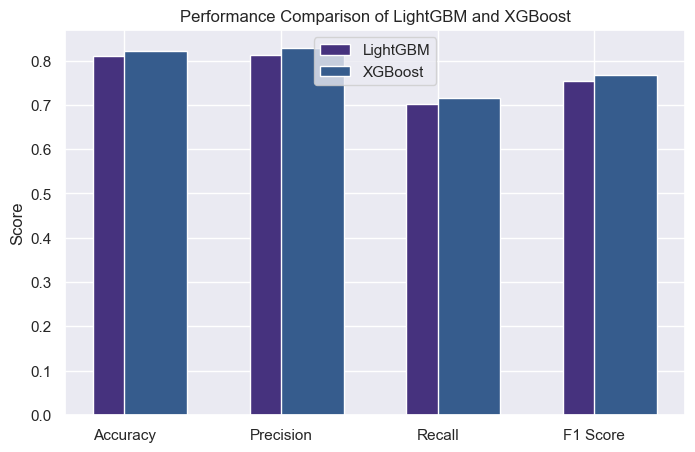

In [86]:
# Visualization can include comparison charts of model performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_metrics = [accuracy_score(y_test,Q), precision_score(y_test,Q),
               recall_score(y_test,Q), f1_score(y_test,Q)]
xgb_metrics = [accuracy_score(y_test,Y), precision_score(y_test,Y),
               recall_score(y_test,Y), f1_score(y_test,Y)]

# Bar plot for comparison
plt.figure(figsize=(8, 5))
plt.bar(metrics, lgb_metrics, width=0.4, label='LightGBM', align='center')
plt.bar(metrics, xgb_metrics, width=0.4, label='XGBoost', align='edge')
plt.ylabel('Score')
plt.title('Performance Comparison of LightGBM and XGBoost')
plt.legend()
plt.show()